In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [133]:
# Data Loading
wine = pd.read_csv('data.csv')
wine
print(sorted(wine['quality'].unique()))

[3, 4, 5, 6, 7, 8]


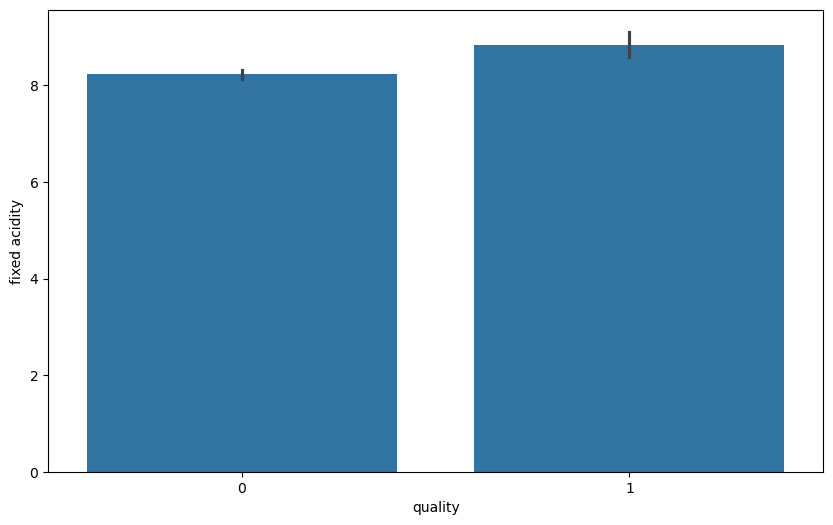

In [51]:
# Fixed Acidity vs Wine Quality visualize how fixed acidity varies across different wine quality levels.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.show()

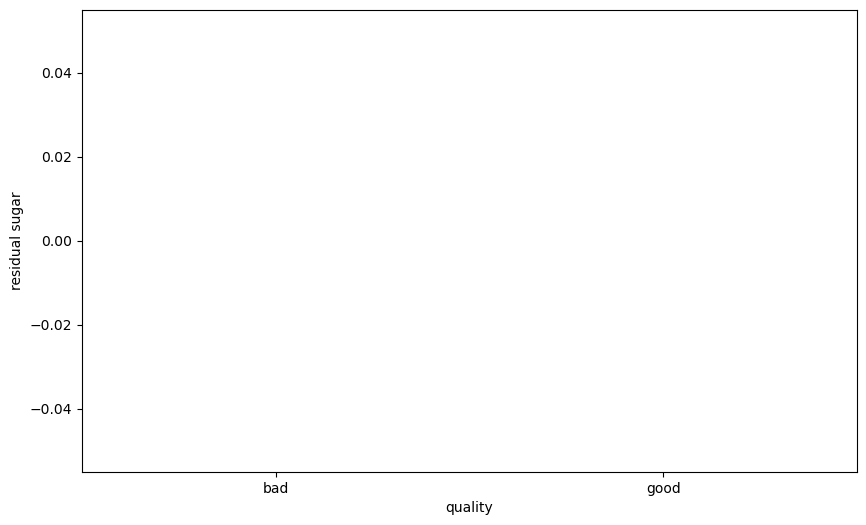

In [57]:
# Residual Sugar vs Wine Quality.This barplot helps visualize how residual sugar levels vary across different wine quality scores.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
plt.show()

In [135]:
### Binning Wine Quality into Categories. We simplify the 'quality' column by grouping numerical scores into two categories:'bad' and 'good'.

bins = (2, 6.5, 8.1)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names, include_lowest=True)

In [139]:
wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [115]:
# Label Encoding Wine Quality.To prepare the target variable for machine learning models.
# We use Label Encoding to convert the categorical wine quality labels ('bad','good') into numerical form.

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

In [87]:
# Splitting Features and Target
# We now split the dataset into independent features X and the target variable y:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [89]:
#Train-Test Split divide the data into training and testing sets using an 80-20 split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [141]:
#Feature Scaling with StandardScaler to normalize the input features so that each has a mean of 0 and standard deviation of 1:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [145]:
#Model Training and Prediction: Random Forest Classifier .We train a Random Forest Classifier with 200 decision trees:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [147]:
#Evaluating RFC model performance 
print("Accuaracy score =",accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

Accuaracy score = 0.88125
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.68      0.36      0.47        47

    accuracy                           0.88       320
   macro avg       0.79      0.67      0.70       320
weighted avg       0.87      0.88      0.87       320



In [97]:
# Model Training and Prediction: Support Vector Classifier (SVC). We also train a Support Vector Classifier to compare its performance with the Random Forest model
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [149]:
#Evaluating SVC model performance 
print("Accuaracy score =",accuracy_score(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

Accuaracy score = 0.875
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [151]:
#Hyperparameter Tuning: Support Vector Classifier (SVC).We use GridSearchCV to find the best combination of hyperparameters for the SVC model:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc,param, cv=10, verbose=2)

In [155]:
#Training with GridSearchCV
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [156]:
# This step runs through all combinations of C, kernel, and gamma specified in the parameter grid.
# It performs 10-fold cross-validation (cv=10) for each combination. 
# After completion, the best-performing model can be retrieved using:
best_svc = grid_svc.best_estimator_
best_params = grid_svc.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}


In [104]:
# Final prediction using best SVC from GridSearchCV
pred = grid_svc.predict(X_test)

# Accuracy and classification report
print("Accuaracy score =", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuaracy score = 0.896875
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [161]:
#Random Forest Classifier - Cross Validation
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10, verbose=2)
rfc_score=rfc_eval.mean()

# Cross-validation for the best SVC model (from GridSearchCV)
svc_eval = cross_val_score(estimator=grid_svc.best_estimator_, X=X_train, y=y_train, cv=10, verbose=0)
svc_score = svc_eval.mean()

# Print comparison
print(f"Random Forest - CV Accuracy: {rfc_score:.4f}")
print(f"Tuned SVC       - CV Accuracy: {svc_score:.4f}")

[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.6s
Random Forest - CV Accuracy: 0.9117
Tuned SVC       - CV Accuracy: 0.9085


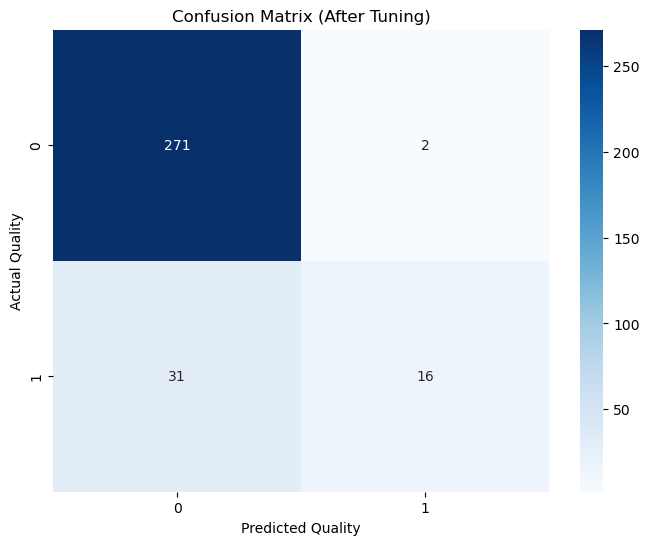

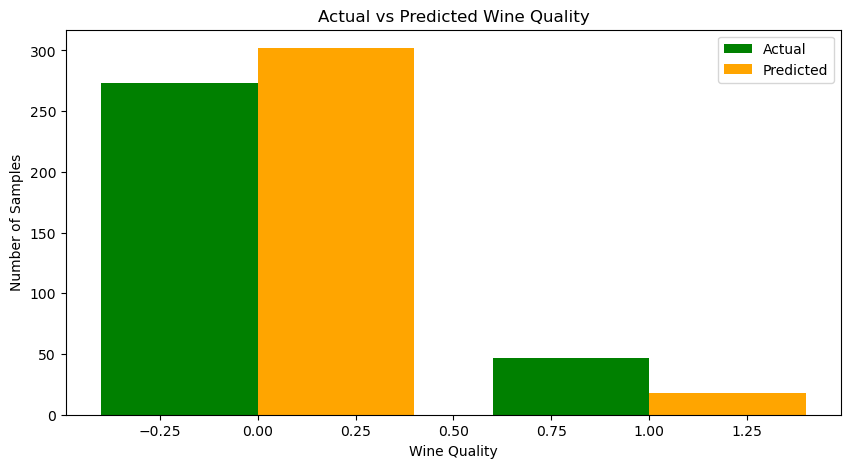

In [43]:
# 📉 Plot Confusion Matrix (Actual vs Predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (After Tuning)")
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.show()

# 📊 Compare actual vs predicted distributions
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(pred).value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(actual_counts.index - 0.2, actual_counts.values, width=0.4, label='Actual', color='green')
plt.bar(predicted_counts.index + 0.2, predicted_counts.values, width=0.4, label='Predicted', color='orange')
plt.xlabel('Wine Quality')
plt.ylabel('Number of Samples')
plt.title('Actual vs Predicted Wine Quality')
plt.legend()
plt.show()

In [ ]:
Insight: Both models perform competitively, with Random Forest slightly outperforming the tuned SVC in cross-validation accuracy. Given its performance and robustness, Random Forest may be preferred for this classification task.